In [1]:
from ddpg import DDPGAgent

In [2]:
from runner import Runner
import matplotlib.pyplot as plt

In [11]:
# runner = Runner('BipedalWalker-v3','result')
runner = Runner('CarRacing-v0','result')
# runner = Runner('Pendulum-v0','result')

state_shape = runner.env.observation_space.shape
action_shape = runner.env.action_space.shape
act_limit_high = runner.env.action_space.high
act_limit_low = runner.env.action_space.low
runner.close()
 
print(state_shape)
print(action_shape)
print(act_limit_high)
print(act_limit_low)

(96, 96, 3)
(3,)
[1. 1. 1.]
[-1.  0.  0.]


In [13]:
agent = DDPGAgent(state_shape, action_shape, neurons_actor = [32,16],neurons_critic = [32,16],
                 act_limit_high = act_limit_high, act_limit_low = act_limit_low, buffer_size = 50000,
                  gamma = 0.99, lr_actor = 0.001, lr_critic = 0.001, act_noise = 0.1, polyak = 0.995, input_is_picture = True)

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 96, 96, 8)    224         input_39[0][0]                   
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 96, 96, 8)    32          conv2d_61[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_60 (LeakyReLU)      (None, 96, 96, 8)    0           batch_normalization_60[0][0]     
___________________________________________________________________________________________

In [9]:
agent = DDPGAgent(state_shape, action_shape, neurons_actor = [512,512],neurons_critic = [512,512],
                 act_limit_high = act_limit_high, act_limit_low = act_limit_low, buffer_size = 50000,
                  gamma = 0.99, lr_actor = 0.001, lr_critic = 0.001, act_noise = 0.1, polyak = 0.995)

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 24)]         0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 28)           0           input_25[0][0]                   
                                                                 input_26[0][0]                   
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 512)          14848       concatenate_8[0][0]       

In [ ]:
agent.load_agent('/content/drive/My Drive/Colab Notebooks/Actor Critic/weights/BipedalWalker/256_256/BW')

Loaded


In [ ]:
agent.load_agent('/content/drive/My Drive/Colab Notebooks/Actor Critic/weights/BipedalWalker/512_512/BW')

Loaded


In [ ]:
 agent.load_agent('/content/drive/My Drive/Colab Notebooks/Actor Critic/weights/BipedalWalkerHardcore/256_256/BW')

Loaded


Not enough memory in replay buffer
episode: 1/15 | score: -1061.4408769283013 | steps: 200 | time: 5.16
Not enough memory in replay buffer
episode: 2/15 | score: -946.3593708241917 | steps: 200 | time: 4.99
Not enough memory in replay buffer
episode: 3/15 | score: -1017.6238753742238 | steps: 200 | time: 4.86
Not enough memory in replay buffer
episode: 4/15 | score: -917.1765902691812 | steps: 200 | time: 4.93
Not enough memory in replay buffer
episode: 5/15 | score: -1087.5280247538853 | steps: 200 | time: 4.83
Experience replay done 50 times
episode: 6/15 | score: -866.6527961353723 | steps: 200 | time: 9.44
Experience replay done 50 times
episode: 7/15 | score: -1458.5138143613203 | steps: 200 | time: 9.12
Experience replay done 50 times
episode: 8/15 | score: -1572.7805557731274 | steps: 200 | time: 9.09
Experience replay done 50 times
episode: 9/15 | score: -1163.3233612981796 | steps: 200 | time: 8.95
Experience replay done 50 times
episode: 10/15 | score: -1712.3791465136946 | s

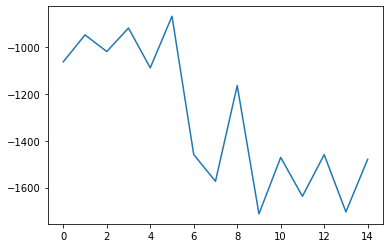

In [ ]:
# runner = Runner('Pendulum-v0','result/Pendulum-v0')
# history = runner.train(agent, num_episodes = 15, render_freq = 0)
# runner.close()
 
# plt.plot(history)

In [ ]:
for _ in range(10):
    runner = Runner('BipedalWalker-v3','result/BipedalWalker-v3/512_512/')
    history = runner.train(agent, num_episodes = 100, render_freq = 0, replay_per_step = 1, batch_size = 64)
    runner.close()
    
    plt.plot(history)

    agent.save_agent('/content/drive/My Drive/Colab Notebooks/Actor Critic/weights/BipedalWalker/512_512/BW')

In [ ]:
for _ in range(2):
    runner = Runner('BipedalWalkerHardcore-v3','result/BipedalWalkerHardcore-v3/256_256/')
    history = runner.train(agent, num_episodes = 100, render_freq = 0, replay_per_step = 1, batch_size = 64)
    runner.close()

    plt.plot(history)

    agent.save_agent('/content/drive/My Drive/Colab Notebooks/Actor Critic/weights/BipedalWalkerHardcore/256_256/BW')

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


episode: 1/100 | score: -68.64645977274132 | steps: 283 | replay: 283 | time: 55.53
episode: 2/100 | score: -63.27109478171915 | steps: 211 | replay: 211 | time: 40.62
episode: 3/100 | score: -53.185149502362655 | steps: 254 | replay: 254 | time: 48.83
episode: 4/100 | score: -78.23810841404747 | steps: 161 | replay: 161 | time: 30.88
episode: 5/100 | score: -72.16947605026112 | steps: 275 | replay: 275 | time: 55.06
episode: 6/100 | score: -92.46289266129658 | steps: 152 | replay: 152 | time: 29.93
episode: 7/100 | score: -87.96744192866102 | steps: 159 | replay: 159 | time: 31.27
episode: 8/100 | score: -83.08836107802003 | steps: 164 | replay: 164 | time: 32.12


In [ ]:
agent.save_agent('/content/drive/My Drive/Colab Notebooks/Actor Critic/weights/BipedalWalkerHardcore/256_256/BW')

Saved
